In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1D Steady Heat Conduction

In [2]:
# Initialize parameters of the question
k = 50 # Thermal conductivity, W/K
L = 1000e-3 # m
A = 75e-6 # m^2
# cp = 1 # Specific heat capacity, J/(kg * K)
# rho = 1 # kg/m^3
# C = cp*rho # J/K, volume specific

# boundary conditions
T_L = 390 # K, x=0
T_R = 290 # K, x=L


In [3]:
# discretize the space
n_elem = 5
n_nodes = n_elem + 1
l_elem = L/n_elem
nodes_x = np.linspace(0, L, n_nodes)
print("Positions of nodes", nodes_x)

n_dof = n_elem # degree of freedom of the system

CON = [] # connectivity
for i in range(n_elem):
    CON.append([i, i+1])
print("Connectivty", CON)

class Element:
    def __init__(self, nodes, x, k, l):
        self.nodes = nodes
        self.x = x
        self.k = k
        self.l = l

    def __repr__(self):
        return f"Element(nodes={self.nodes})"

# create elements
elements = []
for i in range(n_elem):
    x = l_elem*(i+0.5)
    elements.append(Element(CON[i], x, k, l_elem))

print("Elements", elements)


Positions of nodes [0.  0.2 0.4 0.6 0.8 1. ]
Connectivty [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]]
Elements [Element(nodes=[0, 1]), Element(nodes=[1, 2]), Element(nodes=[2, 3]), Element(nodes=[3, 4]), Element(nodes=[4, 5])]


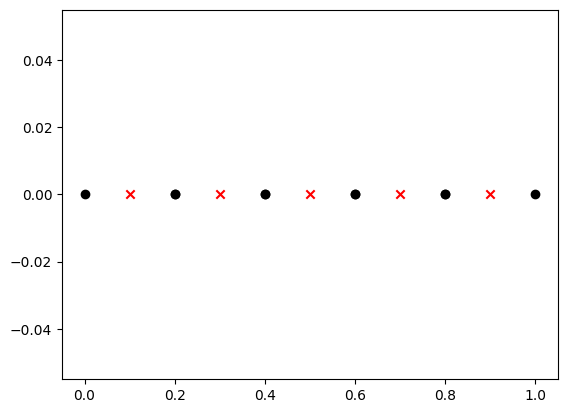

In [5]:
# plot elements and nodes
for i in range(n_elem):
    element = elements[i]
    plt.scatter([element.x], [0], color='red', marker="x", label=f"E_{i}")
    node_1 = element.nodes[0]
    node_2 = element.nodes[1]
    x1 = nodes_x[node_1]
    x2 = nodes_x[node_2]
    plt.scatter(x1, 0, color='black', marker="o", label=f"N_{node_1}")
    plt.scatter(x2, 0, color='black', marker="o", label=f"N_{node_2}")

# plt.legend()
plt.show()